In [6]:
#Import Library yang dibutuhkan

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [15]:
#PANGGIL DATASET KE DALAM DATAFRAME

In [16]:
data = pd.read_csv("chocolate_bars.csv")
data.head()

,id,manufacturer,company_location,year_reviewed,bean_origin,bar_name,cocoa_percent,num_ingredients,ingredients,review,rating
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,3.0,"B,S,C","rich cocoa, fatty, bready",3.25
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76.0,3.0,"B,S,C","cocoa, vegetal, savory",3.50
2,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.0,"B,S,C","cocoa, blackberry, full body",3.75
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68.0,3.0,"B,S,C","chewy, off, rubbery",3.00
4,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72.0,3.0,"B,S,C","fatty, earthy, moss, nutty,chalky",3.00


In [17]:
data.isna().sum()

id                   0
manufacturer         0
company_location     0
year_reviewed        0
bean_origin          0
bar_name             0
cocoa_percent        0
num_ingredients     87
ingredients         87
review               0
rating               0
dtype: int64

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2530 entries, 0 to 2529
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                2530 non-null   int64  
 1   manufacturer      2530 non-null   object 
 2   company_location  2530 non-null   object 
 3   year_reviewed     2530 non-null   int64  
 4   bean_origin       2530 non-null   object 
 5   bar_name          2530 non-null   object 
 6   cocoa_percent     2530 non-null   float64
 7   num_ingredients   2443 non-null   float64
 8   ingredients       2443 non-null   object 
 9   review            2530 non-null   object 
 10  rating            2530 non-null   float64
dtypes: float64(3), int64(2), object(6)
memory usage: 217.5+ KB


### KMeans Clustering

In [71]:
points = data[['rating','cocoa_percent']]
points = points.values
print(points)

[[ 3.25 76.  ]
 [ 3.5  76.  ]
 [ 3.75 76.  ]
 ...
 [ 3.   75.  ]
 [ 3.25 70.  ]
 [ 3.5  72.  ]]


In [72]:
model = KMeans(n_clusters=6)
model.fit(points)

KMeans(n_clusters=6)

In [73]:
y = model.fit_predict(points)
print(y)

[2 2 2 ... 2 0 0]


In [74]:
clusters = range(1,7)
inertias = []

for n in clusters:
    model = KMeans(n_clusters=n)
    model.fit(points)
    inertias.append(model.inertia_)

In [59]:
y = model.fit_predict(points)
print(y)

[4 4 4 ... 4 1 1]


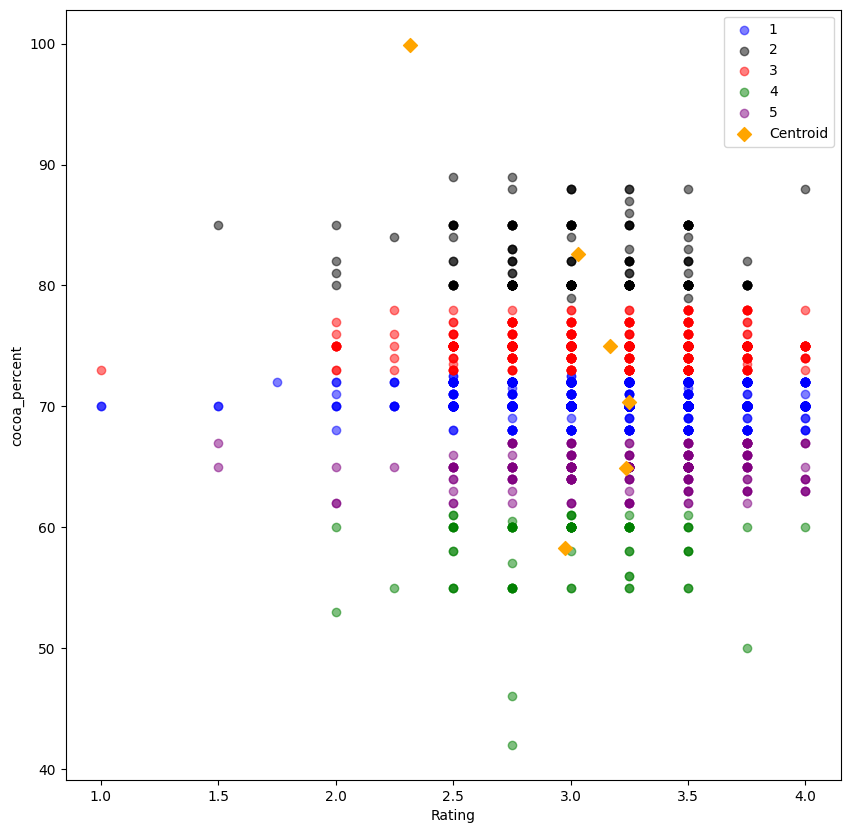

In [97]:
# xs = points.iloc[:,0]
# ys = points.iloc[:,1]

centroids = model.cluster_centers_
centroid_x = centroids[:,0]
centroid_y = centroids[:,1]

plt.figure(figsize=(10,10))
plt.scatter(points[y==0,0],points[y==0,1], c='blue',label='1', alpha=0.5)
plt.scatter(points[y==1,0],points[y==1,1], c='black',label='2', alpha=0.5)
plt.scatter(points[y==2,0],points[y==2,1], c='red',label='3', alpha=0.5)
plt.scatter(points[y==3,0],points[y==3,1], c='green',label='4', alpha=0.5)
plt.scatter(points[y==4,0],points[y==4,1], c='purple',label='5', alpha=0.5)

plt.scatter(centroid_x, centroid_y, marker="D", s=50, label="Centroid", color="orange")
plt.xlabel("Rating")
plt.ylabel("cocoa_percent")
plt.legend()
plt.show()

In [87]:
clusters = range(1,7)
inertias = []

for n in clusters:
    model = KMeans(n_clusters=n)
    model.fit(points)
    inertias.append(model.inertia_)

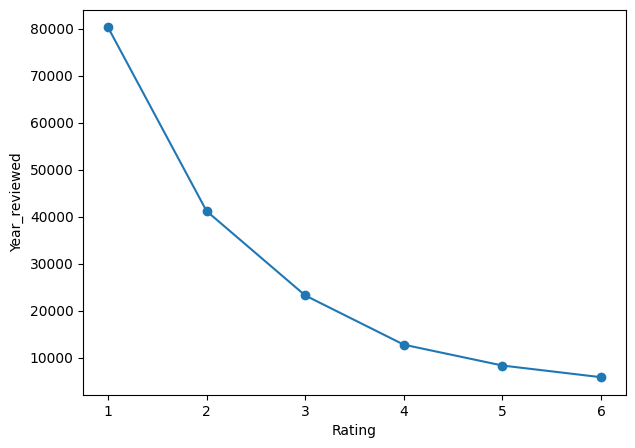

In [99]:
plt.figure(figsize = (7,5))
plt.plot(clusters, inertias, '-o')
plt.xlabel("Rating")
plt.ylabel("Year_reviewed")
plt.xticks(clusters)
plt.show()

### Hierarchical Clustering

In [100]:
from scipy.cluster.hierarchy import dendrogram, linkage, complete

In [101]:
linkage_hr = linkage(points, method='ward')
complete_hr = complete(points)

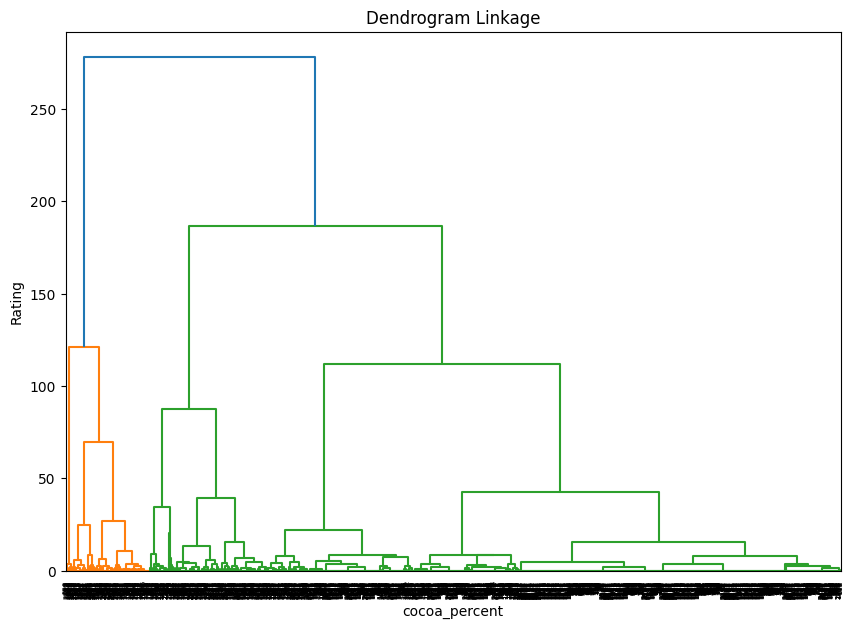

In [102]:
plt.figure(figsize=(10,7))
dendrogram(linkage_hr)
plt.title("Dendrogram Linkage")
plt.xlabel("cocoa_percent")
plt.ylabel("Rating")
plt.show()

In [103]:
from sklearn.cluster import AgglomerativeClustering

In [104]:
hr_cluster = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')

In [105]:
hr_predict = hr_cluster.fit_predict(points)

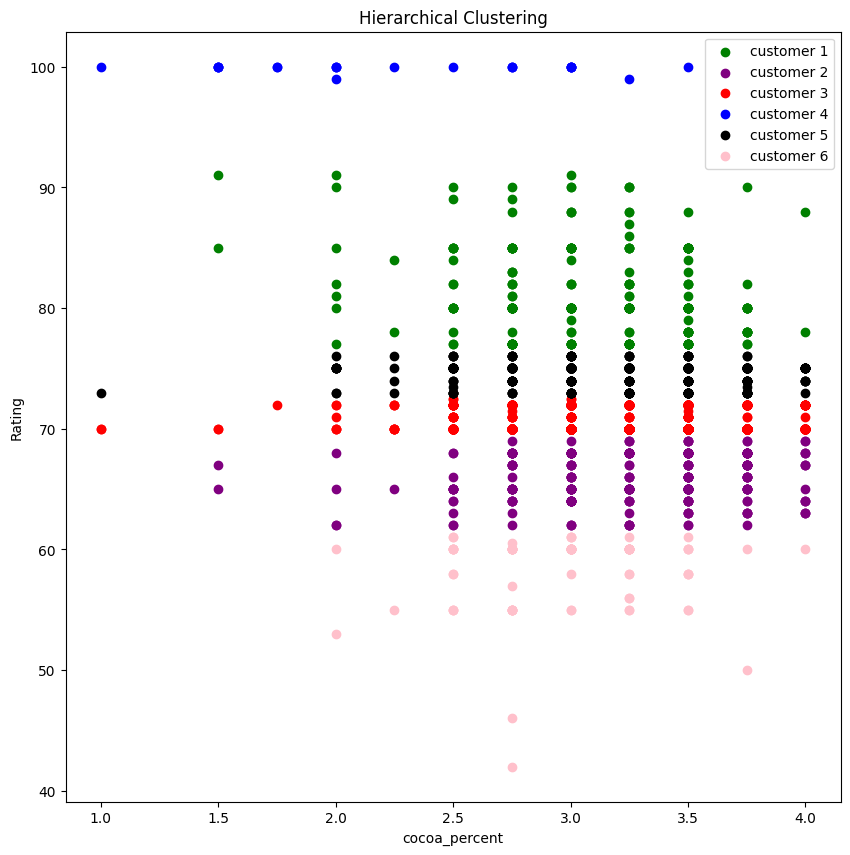

In [106]:
plt.figure(figsize=(10,10))
plt.scatter(points[hr_predict==0,0],points[hr_predict==0,1], c='green',label='customer 1')
plt.scatter(points[hr_predict==1,0],points[hr_predict==1,1], c='purple',label='customer 2')
plt.scatter(points[hr_predict==2,0],points[hr_predict==2,1], c='red',label='customer 3')
plt.scatter(points[hr_predict==3,0],points[hr_predict==3,1], c='blue',label='customer 4')
plt.scatter(points[hr_predict==4,0],points[hr_predict==4,1], c='black',label='customer 5')
plt.scatter(points[hr_predict==5,0],points[hr_predict==5,1], c='pink',label='customer 6')



plt.title("Hierarchical Clustering")
plt.xlabel("cocoa_percent")
plt.ylabel("Rating")
plt.legend()
plt.show()